# Quiz 3

BEFORE YOU START THIS QUIZ:

1. Click on "Copy to Drive" to make a copy of the quiz,

2. Click on "Share",
    
3. Click on "Change" and select "Anyone with this link can edit"
    
4. Click "Copy link" and

5. Paste the link into [this Canvas assignment](https://canvas.olin.edu/courses/313/assignments/4985). 

This quiz is open notes, open internet. The only thing you can't do is ask for help.

Copyright 2021 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [2]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/DSIRP/raw/main/american-english')

## Question 1

The following is the implementation of a binary search tree (BST) from `search.ipynb`.

In [2]:
class Node:
    def __init__(self, data, left=None, right=None):
        self.data = data
        self.left = left
        self.right = right
        
    def __repr__(self):
        return f'Node({self.data}, {repr(self.left)}, {repr(self.right)})'

In [3]:
class BSTree:
    def __init__(self, root=None):
        self.root = root
        
    def __repr__(self):
        return f'BSTree({repr(self.root)})'

In [4]:
def insert(tree, data):
    tree.root = insert_rec(tree.root, data)
    
def insert_rec(node, data):
    if node is None:
        return Node(data)
    
    if data < node.data:
        node.left = insert_rec(node.left, data)
    else:
        node.right = insert_rec(node.right, data)
        
    return node

The following cell reads words from a file and adds them to a BST.
But if you run it, you'll get a `RecursionError`.

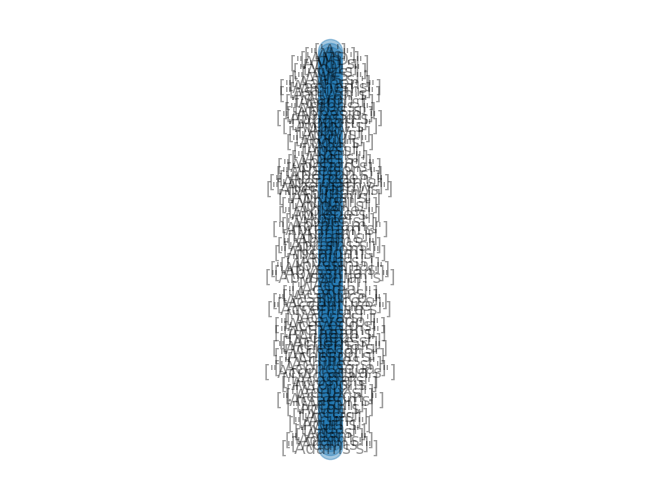

In [10]:
import sys
import networkx as nx
from EoN import hierarchy_pos

sys.setrecursionlimit(10000)

filename = 'american-english'
tree = BSTree()
i = 0

for line in open(filename):
    for word in line.split():
        insert(tree, [word.strip()])
    if i == 100:
        break
    i += 1

def add_edges(node, G):
    """Make a NetworkX graph that represents the heap."""
    if node is None:
        return
    
    G.add_node(node, label=node.data)
    for child in (node.left, node.right):
        if child:
            G.add_edge(node, child)
            add_edges(child, G)

def draw_tree(tree):
    G = nx.DiGraph()
    add_edges(tree.root, G)
    pos = hierarchy_pos(G)
    labels = {node: node.data for node in G.nodes()}
    nx.draw(G, pos, labels=labels, alpha=0.4)

draw_tree(tree)

However, if we put the words into a list, shuffle the list, and then put the shuffled words into the BST, it works.

In [5]:
word_list = []
filename = 'american-english'
for line in open(filename):
    for word in line.split():
        word_list.append(word.strip())

In [6]:
from random import shuffle

shuffle(word_list)

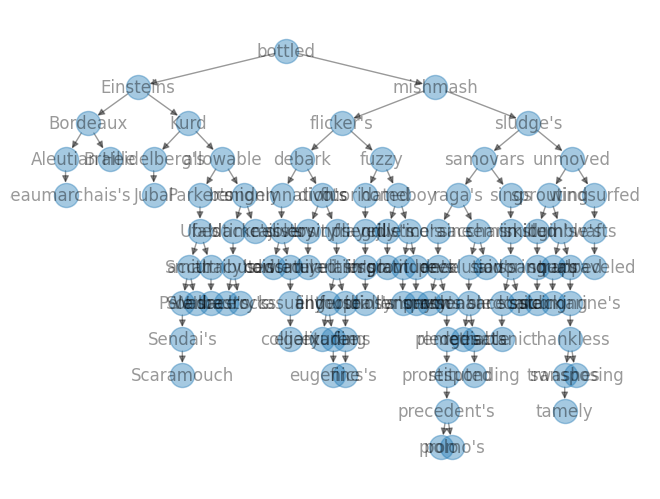

In [7]:
import networkx as nx
from EoN import hierarchy_pos

tree = BSTree()

i = 0
for word in word_list:
    insert(tree, word.strip())
    if i == 100:
        break
    i += 1

def add_edges(node, G):
    """Make a NetworkX graph that represents the heap."""
    if node is None:
        return
    
    G.add_node(node, label=node.data)
    for child in (node.left, node.right):
        if child:
            G.add_edge(node, child)
            add_edges(child, G)

def draw_tree(tree):
    G = nx.DiGraph()
    add_edges(tree.root, G)
    pos = hierarchy_pos(G)
    labels = {node: node.data for node in G.nodes()}
    nx.draw(G, pos, labels=labels, alpha=0.4)

draw_tree(tree)

Write a few clear, complete sentences to answer the following two questions:

1) Why did we get a `RecursionError`, and why does shuffling the words fix the problem?

We got the RecursionError because the function exceeded the maximum recursion depth which for me was defaulted at 1000. By increasing the recursion depth with sys.setrecursionlimit(), the function is able to finish if the limit is increased high enough.

2) What is the order of growth for the whole process; that is, reading the words into a list, shuffling the list, and then putting the shuffled words into a binary search tree. You can assume that `shuffle` is linear.

O(n)

## Question 2

As we discussed in class, there are three versions of the search problem:

1) Checking whether an element is in a collection; for example, this is what the `in` operator does.

2) Finding the index of an element in an ordered collection; for example, this is what the string method `find` does.

3) In a collection of key-value pairs, finding the value that corresponds to a given key; this is what the dictionary method `get` does.

In `search.ipynb`, we used a BST to solve the first problem. In this exercise, you will modify it to solve the third problem.

Here's the code again (although notice that the names of the objects are `MapNode` and `BSTMap`).

In [2]:
class MapNode:
    def __init__(self, data, left=None, right=None):
        self.data = data
        self.left = left
        self.right = right
        
    def __repr__(self):
        return f'Node({self.data}, {repr(self.left)}, {repr(self.right)})'

In [3]:
class BSTMap:
    def __init__(self, root=None):
        self.root = root
        
    def __repr__(self):
        return f'BSTMap({repr(self.root)})'

In [42]:
def insert_map(tree, key, value):
    tree.root = insert_map_rec(tree.root, key, value)
    
def insert_map_rec(node, keys, values):
    if node is None:
        return MapNode({keys: values})
    if values is None:
        return MapNode({keys: values})
    try:
        if keys < list(node.data.keys())[0]:
            node.left = insert_map_rec(node.left, keys, values)
        else:
            node.right = insert_map_rec(node.right, keys, values)
    except TypeError:
        return MapNode({keys: values})
        
    return node

Modify this code so that it stores keys and values, rather than just elements of a collection.
Then write a function called `get` that takes a `BSTMap` and a key:

* If the key is in the map, it should return the corresponding value;

* Otherwise it should raise a `KeyError` with an appropriate message.

You can use the following code to test your implementation.

In [43]:
tree_map = BSTMap()

keys = 'uniqueltrs'
values = range(len(keys))
for key, value in zip(keys, values):
    insert_map(tree_map, key, value)

tree_map

BSTMap(Node({'u': 0}, Node({'n': 1}, Node({'i': 2}, Node({'e': 5}, None, None), Node({'l': 6}, None, None)), Node({'q': 3}, None, Node({'t': 7}, Node({'r': 8}, None, Node({'s': 9}, None, None)), None))), Node({'u': 4}, None, None)))

In [49]:
def get(tree, key):
    itr = tree.root
    while True:
        if list(itr.data.keys())[0] == key:
            return list(itr.data.values())[0]
        elif list(itr.data.keys())[0] < key:
            itr = itr.right
            if itr == None:
                return KeyError
        elif list(itr.data.keys())[0] > key:
            itr = itr.left
            if itr == None:
                return KeyError
        



for key in keys:
    print(key, get(tree_map, key))

u 0
n 1
i 2
q 3
u 0
e 5
l 6
t 7
r 8
s 9


The following should raise a `KeyError`.

In [50]:
get(tree_map, 'b')

KeyError

## Alternative solution

In [44]:
import networkx as nx

def add_edges(node, G):
    """Make a NetworkX graph that represents the heap."""
    if node is None:
        return
    
    G.add_node(node, label=node.data)
    for child in (node.left, node.right):
        if child:
            G.add_edge(node, child)
            add_edges(child, G)

In [46]:
G = nx.DiGraph()
add_edges(tree_map.root, G)
G.nodes()

NodeView((Node({'u': 0}, Node({'n': 1}, Node({'i': 2}, Node({'e': 5}, None, None), Node({'l': 6}, None, None)), Node({'q': 3}, None, Node({'t': 7}, Node({'r': 8}, None, Node({'s': 9}, None, None)), None))), Node({'u': 4}, None, None)), Node({'n': 1}, Node({'i': 2}, Node({'e': 5}, None, None), Node({'l': 6}, None, None)), Node({'q': 3}, None, Node({'t': 7}, Node({'r': 8}, None, Node({'s': 9}, None, None)), None))), Node({'i': 2}, Node({'e': 5}, None, None), Node({'l': 6}, None, None)), Node({'e': 5}, None, None), Node({'l': 6}, None, None), Node({'q': 3}, None, Node({'t': 7}, Node({'r': 8}, None, Node({'s': 9}, None, None)), None)), Node({'t': 7}, Node({'r': 8}, None, Node({'s': 9}, None, None)), None), Node({'r': 8}, None, Node({'s': 9}, None, None)), Node({'s': 9}, None, None), Node({'u': 4}, None, None)))

In [47]:
labels = {node: node.data for node in G.nodes()}
labels

{Node({'u': 0}, Node({'n': 1}, Node({'i': 2}, Node({'e': 5}, None, None), Node({'l': 6}, None, None)), Node({'q': 3}, None, Node({'t': 7}, Node({'r': 8}, None, Node({'s': 9}, None, None)), None))), Node({'u': 4}, None, None)): {'u': 0},
 Node({'n': 1}, Node({'i': 2}, Node({'e': 5}, None, None), Node({'l': 6}, None, None)), Node({'q': 3}, None, Node({'t': 7}, Node({'r': 8}, None, Node({'s': 9}, None, None)), None))): {'n': 1},
 Node({'i': 2}, Node({'e': 5}, None, None), Node({'l': 6}, None, None)): {'i': 2},
 Node({'e': 5}, None, None): {'e': 5},
 Node({'l': 6}, None, None): {'l': 6},
 Node({'q': 3}, None, Node({'t': 7}, Node({'r': 8}, None, Node({'s': 9}, None, None)), None)): {'q': 3},
 Node({'t': 7}, Node({'r': 8}, None, Node({'s': 9}, None, None)), None): {'t': 7},
 Node({'r': 8}, None, Node({'s': 9}, None, None)): {'r': 8},
 Node({'s': 9}, None, None): {'s': 9},
 Node({'u': 4}, None, None): {'u': 4}}

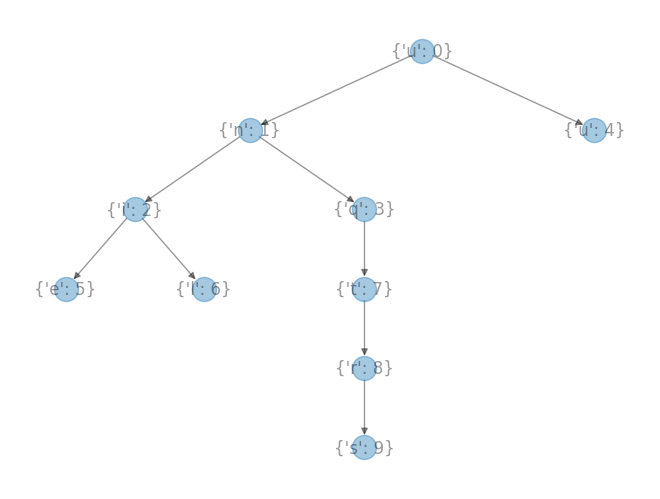

In [48]:
from EoN import hierarchy_pos

def draw_tree(tree):
    G = nx.DiGraph()
    add_edges(tree.root, G)
    pos = hierarchy_pos(G)
    labels = {node: node.data for node in G.nodes()}
    nx.draw(G, pos, labels=labels, alpha=0.4)

draw_tree(tree_map)

Modify this code so that it stores keys and values, rather than just elements of a collection.
Then write a function called `get` that takes a `BSTMap` and a key:

* If the key is in the map, it should return the corresponding value;

* Otherwise it should raise a `KeyError` with an appropriate message.

You can use the following code to test your implementation.

In [30]:
tree_map = BSTMap()

keys = 'uniqueltrs'
values = range(len(keys))
for key, value in zip(keys, values):
    print(key, value)
    insert_map(tree_map, key, value)

tree_map

In [31]:
for key in keys:
    print(key, get(tree_map, key))